In [1]:
# we import the nescessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# we import the datasets

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')

In [285]:
# we take a look at the first two rows of the dataset

df.head(3)

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [286]:
# we select the x and y data
x = df.iloc[:,2:].values
y = df.iloc[:,1].values

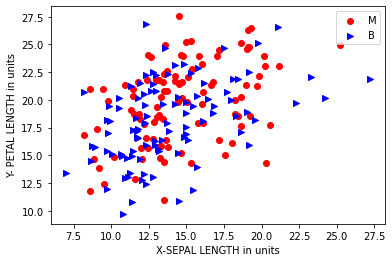

In [312]:
plt.scatter(x[:100, 0], x[:100, 1], marker = 'o', color = 'red', label = 'M')
plt.scatter(x[100:200, 0], x[100:200, 1], marker = '>', color = 'blue', label = 'B')
plt.xlabel('X-SEPAL LENGTH in units')
plt.ylabel('Y- PETAL LENGTH in units')
plt.legend()
plt.show()

In [288]:
# we convert categorical values into digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [289]:
y = le.fit_transform(y)

In [290]:
# we now split the datasets into train and tests
from sklearn.model_selection import train_test_split

In [291]:
data_train, data_test, labels_train, labels_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 1)

In [292]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data_train)
data_train = sc.transform(data_train)
data_test = sc.transform(data_test)

In [293]:
# we now use the LinearRegression algorithm
from sklearn.svm import SVC

In [294]:
sv = SVC()

In [295]:
model = sv.fit(data_train, labels_train)

In [296]:
pred = model.predict(x_test)

In [297]:
# we use test the accuracy score
from sklearn.metrics import accuracy_score

In [298]:
accurate_score = accuracy_score(y_test, pred)

In [299]:
accurate_score

0.9824561403508771

In [300]:
# we check the classification report
from sklearn.metrics import classification_report

In [318]:
class_report = classification_report(y_test, pred, output_dict=True)

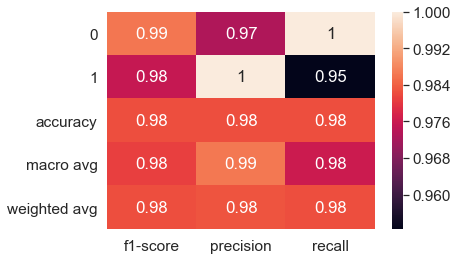

In [322]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)

In [302]:
# we check the confusion matrix
from sklearn.metrics import confusion_matrix

In [303]:
confusion = confusion_matrix(y_test, pred)

In [304]:
confusion

array([[72,  0],
       [ 2, 40]], dtype=int64)

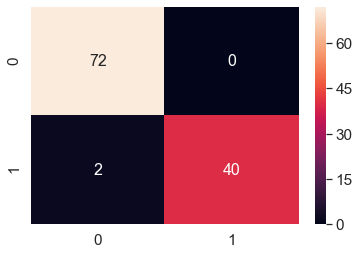

In [321]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [323]:
pred = le.inverse_transform(pred)

In [327]:
result = pd.DataFrame(pred)


In [330]:
id = df.iloc[:,0]

In [333]:
id = pd.DataFrame(id)

In [335]:
research = pd.concat([id,result], axis = 1)

In [338]:
research = research.dropna()

In [339]:
research.columns = ['id', 'Result']

In [341]:
research.head(5)

,id,Result
0,842517,B
1,84300903,B
2,84348301,B
3,84358402,B
4,843786,B
